<h1>Notes</h1>

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

In [1]:
#file browser widget allows one to easily select a dataset file to load

from ipyfilechooser import FileChooser

datasetPath = ''

fc = FileChooser('')
fc.filter_pattern = '*.csv'
display(fc)

def onFileSelect(chooser):
    global datasetPath
    print(fc.selected)
    datasetPath = fc.selected

fc.register_callback(onFileSelect)

FileChooser(path='C:\Users\Yabba\Documents\Projects\MLMS', filename='', title='', show_hidden=False, select_de…

C:\Users\Yabba\Documents\Projects\MLMS\dataset_16x16-40m_2r-10000t.csv


In [3]:
#Imports selected CSV file and displays part of it

import os
import pandas as pd
import matplotlib.pyplot as plt

mlFrame = pd.read_csv(datasetPath)

#Splits dataframe into independent variables and dependant variable
x = mlFrame.iloc[:,:-1]
y = mlFrame.iloc[:,-1]

display(mlFrame)


,"(-2, -2)","(-1, -2)","(0, -2)","(+1, -2)","(+2, -2)","(-2, -1)","(-1, -1)","(0, -1)","(+1, -1)","(+2, -1)",...,"(-1, +1)","(0, +1)","(+1, +1)","(+2, +1)","(-2, +2)","(-1, +2)","(0, +2)","(+1, +2)","(+2, +2)",IsMine
0,-2,-2,0,1,-1,-2,-2,0,1,-1,...,-2,-1,-1,2,-2,-2,-1,2,1,1
1,-2,-2,-1,1,0,-2,-2,1,1,0,...,-2,1,1,1,-2,-2,-1,-1,-1,0
2,-2,-2,-1,-1,-1,-2,-2,-1,-1,-1,...,-2,-1,-1,-1,-2,-2,-1,-1,-1,0
3,-2,-2,-1,-1,-1,-2,-2,-1,-1,-1,...,-2,-1,-1,-1,-2,-2,-1,-1,-1,0
4,-2,0,1,-1,1,-2,0,1,-1,2,...,-1,-1,2,1,-2,-1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,2,1,0,1,-1,-1,1,0,1,1
9996,-2,-2,-2,-2,-2,-1,1,0,0,1,...,-1,1,0,1,-1,1,1,0,0,0
9997,-1,1,0,0,1,-1,2,1,0,1,...,1,1,0,0,-1,1,0,0,0,1
9998,-1,1,0,0,0,3,2,1,0,0,...,1,1,0,1,0,1,2,2,3,1


In [13]:
from sklearn import datasets, svm, metrics
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

#clf = svm.SVC(gamma=0.001)
clf = Perceptron(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.75, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train.values, y_train.values)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test.values)


Classification report for classifier Perceptron(random_state=42):
              precision    recall  f1-score   support

           0       0.59      0.61      0.60      4389
           1       0.43      0.41      0.42      3111

    accuracy                           0.53      7500
   macro avg       0.51      0.51      0.51      7500
weighted avg       0.52      0.53      0.53      7500


Confusion matrix:
[[2686 1703]
 [1845 1266]]


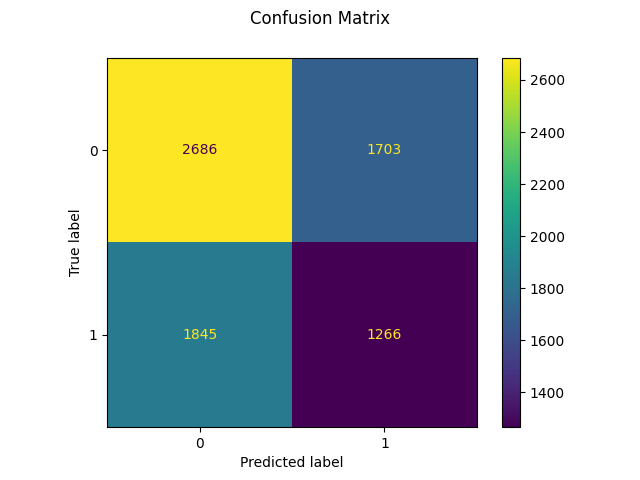

In [14]:
#Generates report and confusion matrix

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Starting point at (0, 10)
Selected [0, 10]


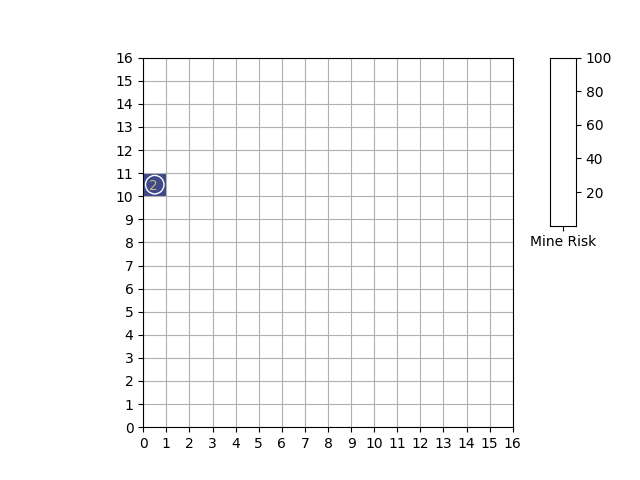

1.71390843154201e-13
2.789468092090812e-08
2.789468092090812e-08
2.789468092090812e-08
2.789468092090812e-08
2.789468092090812e-08
Selected [6, 4]


NameError: name 'ax' is not defined

In [7]:
#Creates minesweeper game with ML assistance

import MineSweeper as ms
import DataExtractor as de
import matplotlib.pyplot as plt
import numpy as np
import math


%matplotlib widget
plt.close('all')
plt.ion()


ms0 = ms.MineSweeperBoard()
ms0.generate(16,16,40)

figure = ms0.getBoard()
ax = figure.axes[0]

mineRisk = 0
detChancePlot = figure.add_subplot(2,16,16)
detChance = detChancePlot.bar(['Mine Risk'],[mineRisk])
detChancePlot.set_ylim(100)
detChancePlot.tick_params(left = False, labelleft = False, right = True, labelright = True)
detChancePlot.invert_yaxis()

        
text=ax.text(0,-2, "", va="bottom", ha="left")

#uses ML to see what the chance is that the cell is a mine
mouseCoords = [0,0]
def onMouseMove(event):
    global mineRisk
    global mouseCoords
    global detChancePlot
    global detChance
    if (event.xdata and event.xdata) :
        if (math.floor(event.xdata) != mouseCoords[0] or math.floor(event.ydata) != mouseCoords[1]) :
            mouseCoords = [math.floor(event.xdata),math.floor(event.ydata)]
            eval = evalCell()
            
            text.set_text(str(eval))
            mineRisk = (eval[0][1] / (eval[0][0] + eval[0][1])) * 100
            print(mineRisk)
            detChancePlot.cla()
            detChance = detChancePlot.bar(['Mine Risk'],[mineRisk])
            detChancePlot.set_ylim(0,100)
            pass

def evalCell():
    global clf
    testData = de.getCellSquares(ms0.visb,mouseCoords[1],mouseCoords[0],2)
    #testFrame = pd.DataFrame(testData,columns=xlabels)

    testResults = clf._predict_proba_lr([testData])
    #testResults = clf._predict_proba_lr(testFrame)
    return testResults
     
    

def onClick(event):
    #global ax
    if event.xdata or event.ydata :
        
        ms0.cellSelect(int(event.xdata),int(event.ydata))
        ms0.updateBoard()
        figure.canvas.draw()
        
        

cid = figure.canvas.mpl_connect('button_press_event', onClick)
figure.canvas.mpl_connect('motion_notify_event', onMouseMove)

plt.show()


https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py